In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [55]:
num_samples = 1000
sequence_length = 100
num_class = 2

In [73]:
x_data = np.random.randint(0,4, size = (num_samples, sequence_length), dtype = np.int32)
y_data = np.random.randint(0,num_class, size = (num_samples), dtype = np.int32)
print(x_data)
print(y_data)

[[2 2 2 ... 3 2 0]
 [2 0 0 ... 0 3 0]
 [0 0 3 ... 1 2 3]
 ...
 [0 1 0 ... 3 1 1]
 [3 2 3 ... 2 2 1]
 [0 1 0 ... 1 2 2]]
[0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 

In [74]:
x_data = tf.convert_to_tensor(x_data, dtype = tf.int32)
x_data = tf.one_hot(x_data, depth = 4, dtype = tf.float32)
y_data = tf.one_hot(y_data, depth=num_class, dtype=tf.float32)
y_data = keras.utils.to_categorical(y_data, num_class)

x_data = tf.reshape(x_data, (num_samples, sequence_length, 4))
y_data = tf.reshape(y_data, (num_samples, num_class))


InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 4000 values, but the requested shape has 2000 [Op:Reshape]

In [58]:
split = int(0.8*num_samples)
x_train, x_test = x_data[:split], x_data[split:]
y_train, y_test = y_data[:split], y_data[split:]

In [61]:
model = keras.Sequential([
    keras.layers.Input(shape=(sequence_length,4)),
    keras.layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_class, activation='softmax')
])

In [62]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 40, batch_size = 32, validation_data = (x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Acuracy: {test_acc:.4f}")

Epoch 1/40


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 2, 2), output.shape=(32, 23, 2)

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Sample synthetic genomic dataset
# In a real scenario, load and preprocess actual genomic data
num_samples = 1000
sequence_length = 100
num_classes = 2  # Example: Binary classification

# Generate random DNA sequences encoded as integers (A=0, C=1, G=2, T=3)
x_data = np.random.randint(0, 4, size=(num_samples, sequence_length), dtype=np.int32)
y_data = np.random.randint(0, num_classes, size=(num_samples,), dtype=np.int32)

# Convert inputs to TensorFlow tensors
x_data = tf.convert_to_tensor(x_data, dtype=tf.int32)

# Convert to one-hot encoding
x_data = tf.one_hot(x_data, depth=4, dtype=tf.float32)  # Ensure dtype is float32 for compatibility
y_data = tf.one_hot(y_data, depth=num_classes, dtype=tf.float32)

# Ensure shape consistency
x_data = tf.reshape(x_data, (num_samples, sequence_length, 4))
y_data = tf.reshape(y_data, (num_samples, num_classes))  # Adjust shape to match model output

# Split dataset into training and testing sets
split = int(0.8 * num_samples)
x_train, x_test = x_data[:split], x_data[split:]
y_train, y_test = y_data[:split], y_data[split:]

# Ensure batch size consistency
batch_size = 32
train_steps = len(x_train) // batch_size * batch_size
test_steps = len(x_test) // batch_size * batch_size
x_train, y_train = x_train[:train_steps], y_train[:train_steps]
x_test, y_test = x_test[:test_steps], y_test[:test_steps]

# Build a simple deep learning model
model = keras.Sequential([
    keras.layers.Input(shape=(sequence_length, 4)),
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5176 - loss: 0.7198 - val_accuracy: 0.5052 - val_loss: 0.7010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6278 - loss: 0.6734 - val_accuracy: 0.4948 - val_loss: 0.7247
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5469 - loss: 0.6681 - val_accuracy: 0.5208 - val_loss: 0.7036
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7734 - loss: 0.6173 - val_accuracy: 0.4427 - val_loss: 0.7416
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7779 - loss: 0.5402 - val_accuracy: 0.4271 - val_loss: 0.7778
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8553 - loss: 0.4494 - val_accuracy: 0.4844 - val_loss: 0.8420
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8798 - loss: 0.3620 - val_accuracy: 0.4740 - val_loss: 0.9123
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.2801 - val_accuracy: 0.5156 - val_loss

In [82]:
sample_input = np.random.randint(0, 4, size=(1, sequence_length), dtype=np.int32)
sample_input = tf.one_hot(sample_input, depth=4, dtype=tf.float32)
prediction = model.predict(sample_input)
for i, prediction in enumerate(prediction):
    print(f"Sample {i+1} Predicted Class: {np.argmax(prediction)}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Sample 1 Predicted Class: 0


FileNotFoundError: [WinError 2] The system cannot find the file specified

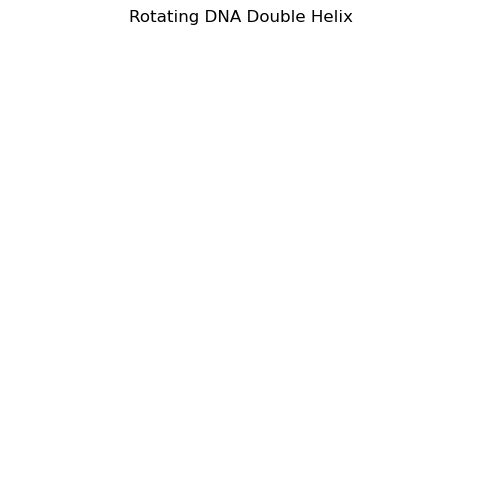

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D

# DNA sequence
sequence = "TCGCTCCAGTGCCAAGAATGTTATATTATTGTAAGGGTTTCCGGCAGTTGGCGACGGATTTGACCTTTTAAACGCCTACACCTCCTATAATCCCCAGTTT"
complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}

# Parameters
n_bp = len(sequence)
bp_per_turn = 10.5
turns = n_bp / bp_per_turn
theta = np.linspace(0, 2 * np.pi * turns, n_bp)
z = np.linspace(0, turns * 3.4, n_bp)
radius = 1

x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
x2 = -x1
y2 = -y1

# Plot setup
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

strand1, = ax.plot([], [], [], color='blue', label='Strand 1')
strand2, = ax.plot([], [], [], color='red', label='Strand 2')
bp_lines = []

def init():
    strand1.set_data([], [])
    strand1.set_3d_properties([])
    strand2.set_data([], [])
    strand2.set_3d_properties([])
    for line in bp_lines:
        line.remove()
    bp_lines.clear()
    return strand1, strand2

def update(frame):
    ax.view_init(elev=30, azim=frame)
    strand1.set_data(x1, y1)
    strand1.set_3d_properties(z)
    strand2.set_data(x2, y2)
    strand2.set_3d_properties(z)
    for line in bp_lines:
        line.remove()
    bp_lines.clear()
    for i in range(n_bp):
        line, = ax.plot([x1[i], x2[i]], [y1[i], y2[i]], [z[i], z[i]], color='gray', alpha=0.5)
        bp_lines.append(line)
    return strand1, strand2, *bp_lines

# Axis settings
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, max(z))
ax.axis('off')
ax.set_title("Rotating DNA Double Helix")

# Animation setup
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2),
                     init_func=init, blit=False, interval=50)

# Save animation to MP4 using FFMpegWriter
writer = FFMpegWriter(fps=20, metadata=dict(artist='Bharat'), bitrate=1800)
anim.save("dna_helix.mp4", writer=writer)

print("✅ Animation saved as dna_helix.mp4")
